<a href="https://colab.research.google.com/github/rishav197/Camera-Calibration-using-OpenCV/blob/main/Camera_Calibration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import cv2
import numpy as np
import os
import glob
from google.colab.patches import cv2_imshow

In [3]:
# Difining the dim of checker board
checkerBoard = (6, 9)
# termination criteria
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)

In [4]:
object_pts = [] # 3D points in real world
image_pts = [] # 2D points in image plane

In [5]:
# Defining the world coordinates for 3D points
objp = np.zeros((1, checkerBoard[0]*checkerBoard[1], 3), np.float32)
print(len(objp), objp.shape)
# print(objp)
objp[0,:,:2] = np.mgrid[0:checkerBoard[0], 0:checkerBoard[1]].T.reshape(-1,2)
# print(objp)
prev_img_shape = None

1 (1, 54, 3)


### Camera Calibration

In [6]:
# extracting each image
images = glob.glob("/content/drive/MyDrive/CV_H2/images25/*.jpg")

for image in images:

  img = cv2.imread(image)
  # print(img)
  gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

  # finding the no. of corners
  ret, corners = cv2.findChessboardCorners(gray, checkerBoard, cv2.CALIB_CB_ADAPTIVE_THRESH + cv2.CALIB_CB_FAST_CHECK + cv2.CALIB_CB_NORMALIZE_IMAGE)

  if ret==True:
    object_pts.append(objp)
    corners2 = cv2.cornerSubPix(gray, corners, (11,11), (-1,-1), criteria)
    # print(corners2)
    image_pts.append(corners2)

    # draw and display the corners
    img = cv2.drawChessboardCorners(img, checkerBoard, corners2, ret) #for RGB images
    # img = cv2.drawChessboardCorners(gray, checkerBoard, corners2, ret) #for gray scale images
    # cv2_imshow(img)
    cv2.waitKey(0)


cv2.destroyAllWindows()

In [7]:
# Camera Calibration

ret, cameraMtx, distCoeff, rvecs, tvecs = cv2.calibrateCamera(object_pts, image_pts, gray.shape[::-1],None,None)

print("Camera matrix:")
print(cameraMtx.shape)
print(cameraMtx)

print("\nDistortion coefficients:")
print(distCoeff.shape)
# print(distCoeff)

print("\nrvecs : ")
print(len(rvecs), len(rvecs[0].shape))
# print(rvecs)

print("\ntvecs : ")
print(len(tvecs), len(tvecs[0]))
# print(tvecs)

Camera matrix:
(3, 3)
[[1.19070059e+03 0.00000000e+00 5.98528099e+02]
 [0.00000000e+00 1.19235144e+03 7.91151419e+02]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]]

Distortion coefficients:
(1, 5)

rvecs : 
25 2

tvecs : 
25 3


##Part 1) Intrinsic Camera Parameters

In [8]:
print("Intrinsic Camera Parameters:")
print("Focal lengths: ({}, {})".format(round(cameraMtx[0][0], 2), round(cameraMtx[1][1], 2)))
print("Skew parameter: {}".format(cameraMtx[0][1]))
print("Principal point: ({}, {})".format(round(cameraMtx[0][2], 2), round(cameraMtx[1][2], 2)))

Intrinsic Camera Parameters:
Focal lengths: (1190.7, 1192.35)
Skew parameter: 0.0
Principal point: (598.53, 791.15)


##Part 2) Extrinsic Camera Paramters

In [9]:
# display rotation matrix and translation vector for each image

for idx in range(len(rvecs)):
  rmtx,_ = cv2.Rodrigues(rvecs[idx])
  print("Rotation Matrix image{}:".format(idx+1))
  print(rmtx)
  print("\ntranslation vector image{}:".format(idx+1))
  print(tvecs[idx])
  print("\n")


Rotation Matrix image1:
[[-0.06261427  0.87442705  0.48109955]
 [-0.90875091  0.14933886 -0.38970461]
 [-0.41261511 -0.46160073  0.78528564]]

translation vector image1:
[[-4.09432471]
 [ 1.28771818]
 [14.83373467]]


Rotation Matrix image2:
[[ 0.03281847  0.9990212   0.02965788]
 [-0.9981893   0.03126563  0.05138666]
 [ 0.05040909 -0.03129061  0.99823836]]

translation vector image2:
[[-3.98907717]
 [ 2.76974378]
 [12.11914878]]


Rotation Matrix image3:
[[-0.00277006  0.99354099  0.11343994]
 [-0.79539708  0.06656539 -0.60242222]
 [-0.60608235 -0.09189854  0.79007522]]

translation vector image3:
[[-4.25834318]
 [ 2.55620445]
 [15.9177424 ]]


Rotation Matrix image4:
[[ 0.07796071  0.98570661  0.1493473 ]
 [-0.95199764  0.02912613  0.30471652]
 [ 0.29601118 -0.16593419  0.94066106]]

translation vector image4:
[[-4.08198816]
 [-0.4557984 ]
 [13.04861431]]


Rotation Matrix image5:
[[-0.00554839  0.97600874  0.21766066]
 [-0.99994387 -0.00345053 -0.01001713]
 [-0.00902576 -0.21770402 

## Part 3) Radial Distortion coeffs

In [10]:
import random

In [11]:
print("Distortion Coeffs:")
print("(k1, k2, p1, p2, k3) = ({}, {}, {}, {}, {})".format(round(distCoeff[0][0], 4), round(distCoeff[0][1], 4), round(distCoeff[0][2], 4), round(distCoeff[0][3], 4), round(distCoeff[0][4], 4)))

Distortion Coeffs:
(k1, k2, p1, p2, k3) = (0.1054, -0.0292, -0.0029, 0.0035, -1.0968)


In [12]:

images = glob.glob("/content/drive/MyDrive/CV_H2/raw_images5/*.jpg")

idx = 1
path = "/content/drive/MyDrive/CV_H2/undist_images5/"
for image in images:
  img = cv2.imread(image)

  h,w = img.shape[:2]
  newCameraMatrix, roi = cv2.getOptimalNewCameraMatrix(cameraMtx, distCoeff, (w,h), 1, (w,h))

  #Undistort the image
  dst = cv2.undistort(img, cameraMtx, distCoeff, None, newCameraMatrix)
  x, y, w, h = roi
  dst = dst[y:y+h, x:x+w]
  calib_img = path+"calibrated_img"+str(idx)+".jpg"
  # print(calib_img)
  cv2.imwrite(calib_img, dst)
  idx += 1



## Part 4) re-projection error

In [13]:
import math
import matplotlib.pyplot as plt

In [14]:
# Reprojection Error

count_error = 0
error_arr = []

for idx in range(len(object_pts)):
  # print(idx)
  img_pts2,_ = cv2.projectPoints(object_pts[idx], rvecs[idx], tvecs[idx], cameraMtx, distCoeff)
  error = cv2.norm(image_pts[idx], img_pts2, cv2.NORM_L2)/len(img_pts2)
  error_arr.append(error)
  print("re-projection error:")
  print("image{}: {}\n".format(idx+1, round(error,2)))
  count_error += error



re-projection error:
image1: 0.14

re-projection error:
image2: 0.12

re-projection error:
image3: 0.13

re-projection error:
image4: 0.12

re-projection error:
image5: 0.12

re-projection error:
image6: 0.1

re-projection error:
image7: 0.13

re-projection error:
image8: 0.11

re-projection error:
image9: 0.09

re-projection error:
image10: 0.1

re-projection error:
image11: 0.13

re-projection error:
image12: 0.09

re-projection error:
image13: 0.25

re-projection error:
image14: 0.14

re-projection error:
image15: 0.15

re-projection error:
image16: 0.17

re-projection error:
image17: 0.11

re-projection error:
image18: 0.12

re-projection error:
image19: 0.15

re-projection error:
image20: 0.14

re-projection error:
image21: 0.12

re-projection error:
image22: 0.21

re-projection error:
image23: 0.16

re-projection error:
image24: 0.1

re-projection error:
image25: 0.09



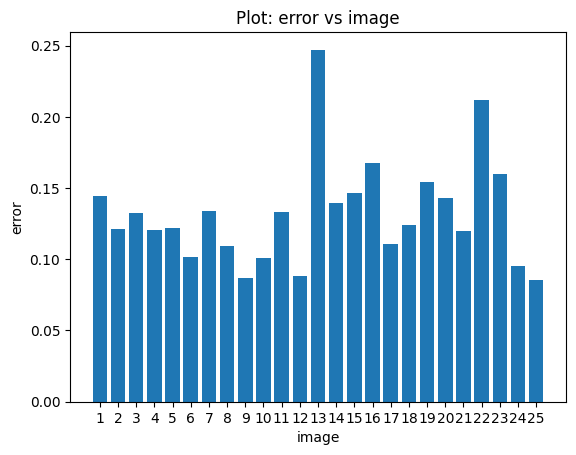

In [15]:
#Plotting errors using bar plot

name_img_arr = []
for idx in range(25):
  # st = "image"+str(idx+1)
  st = str(idx+1)
  name_img_arr.append(st)

# print(name_img_arr)
# print(error_arr)

# plt.figure(figsize=(4, 2))
plt.bar(name_img_arr[:], error_arr[:])
plt.title("Plot: error vs image")
plt.ylabel("error")
plt.xlabel("image")
plt.savefig("errors.png", bbox_inches="tight", pad_inches=2, transparent=False)
plt.show()

In [16]:
mean_error = count_error/len(object_pts)
print("mean of re-projection: {}".format(round(mean_error,2)))

sqOfDev_arr = [(error-mean_error)**2 for error in error_arr]
# print(len(sqOfDev_arr), sqOfDev_arr)

var_error = sum(sqOfDev_arr)/len(object_pts)
print("std deviation of re-projection: {}".format(round(math.sqrt(var_error),2)))

mean of re-projection: 0.13
std deviation of re-projection: 0.04


## Part5) Showing detected corners

Calibrated images

In [17]:

images = glob.glob("/content/drive/MyDrive/CV_H2/images25/*.jpg")

idx = 1
path = "/content/drive/MyDrive/CV_H2/calib_images25/"
for image in images:
  img = cv2.imread(image)

  h,w = img.shape[:2]
  newCameraMatrix, roi = cv2.getOptimalNewCameraMatrix(cameraMtx, distCoeff, (w,h), 1, (w,h))

  #Undistort the image
  dst = cv2.undistort(img, cameraMtx, distCoeff, None, newCameraMatrix)
  x, y, w, h = roi
  dst = dst[y:y+h, x:x+w]
  calib_img = path+"calib_img"+str(idx)+".jpg"
  # print(calib_img)
  cv2.imwrite(calib_img, dst)
  idx += 1



Storing path of calibrated images

In [18]:
images = glob.glob("/content/drive/MyDrive/CV_H2/images25/*.jpg")

calib_arr = []
for image in images:
  # print(image)
  calib_arr.append(image)

calib_arr.sort()
print(len(calib_arr), calib_arr)


25 ['/content/drive/MyDrive/CV_H2/images25/IMG-20230409-WA0001.jpg', '/content/drive/MyDrive/CV_H2/images25/IMG-20230409-WA0002.jpg', '/content/drive/MyDrive/CV_H2/images25/IMG-20230409-WA0003.jpg', '/content/drive/MyDrive/CV_H2/images25/IMG-20230409-WA0004.jpg', '/content/drive/MyDrive/CV_H2/images25/IMG-20230409-WA0005.jpg', '/content/drive/MyDrive/CV_H2/images25/IMG-20230409-WA0006.jpg', '/content/drive/MyDrive/CV_H2/images25/IMG-20230409-WA0007.jpg', '/content/drive/MyDrive/CV_H2/images25/IMG-20230409-WA0008.jpg', '/content/drive/MyDrive/CV_H2/images25/IMG-20230409-WA0009.jpg', '/content/drive/MyDrive/CV_H2/images25/IMG-20230409-WA0010.jpg', '/content/drive/MyDrive/CV_H2/images25/IMG-20230409-WA0011.jpg', '/content/drive/MyDrive/CV_H2/images25/IMG-20230409-WA0012.jpg', '/content/drive/MyDrive/CV_H2/images25/IMG-20230409-WA0013.jpg', '/content/drive/MyDrive/CV_H2/images25/IMG-20230409-WA0014.jpg', '/content/drive/MyDrive/CV_H2/images25/IMG-20230409-WA0015.jpg', '/content/drive/MyDri

In [19]:
# extracting each image
# images = glob.glob("/content/drive/MyDrive/CV_H2/images25/*.jpg")

for image in calib_arr:

  img = cv2.imread(image)
  # print(img)
  gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

  # finding the no. of corners
  ret, corners = cv2.findChessboardCorners(gray, checkerBoard, cv2.CALIB_CB_ADAPTIVE_THRESH + cv2.CALIB_CB_FAST_CHECK + cv2.CALIB_CB_NORMALIZE_IMAGE)

  if ret==True:
    object_pts.append(objp)
    corners2 = cv2.cornerSubPix(gray, corners, (11,11), (-1,-1), criteria)
    image_pts.append(corners2)

    # draw and display the corners
    img = cv2.drawChessboardCorners(img, checkerBoard, corners2, ret) #for RGB images
    # img = cv2.drawChessboardCorners(gray, checkerBoard, corners2, ret) #for gray scale images
    # cv2_imshow(img)
    cv2.waitKey(0)


cv2.destroyAllWindows()

print(len(rvecs))

25


In [20]:
# print(objp)

In [21]:
# print(object_pts)

In [22]:
for idx in range(len(calib_arr)):

  img = cv2.imread(calib_arr[idx])
  gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  imgpoints2,_ = cv2.projectPoints(objp, rvecs[idx], tvecs[idx], cameraMtx, distCoeff)
  # print(imgpoints2)

  img = cv2.drawChessboardCorners(img, checkerBoard, imgpoints2, True) #for RGB images
  # cv2_imshow(img)

## Part 6)

In [23]:
# extracting each image
images = glob.glob("/content/drive/MyDrive/CV_H2/images25/*.jpg")

planeNormal_arr = []
for idx in range(len(rvecs)):
  # print(idx)
  img = cv2.imread(image)
  gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

  # compute checkerboard plane normal
  rot,_ = cv2.Rodrigues(rvecs[idx])
  plane_normal = rot[:, 2]
  # print(plane_normal)
  planeNormal_arr.append(plane_normal)

# print(len(planeNormal_arr))

Normal_arr = []
for idx in range(len(planeNormal_arr)):
  # print(idx)
  tmp_arr = []
  for comp in planeNormal_arr[idx]:
    tmp_arr.append(round(comp,2))
  Normal_arr.append(tmp_arr)

# print checkerboard plane normals for each of 25 images
for idx in range(len(Normal_arr)):
  # print(idx)
  print("image{}: n{} = {}".format(idx+1, idx+1, Normal_arr[idx]))

image1: n1 = [0.48, -0.39, 0.79]
image2: n2 = [0.03, 0.05, 1.0]
image3: n3 = [0.11, -0.6, 0.79]
image4: n4 = [0.15, 0.3, 0.94]
image5: n5 = [0.22, -0.01, 0.98]
image6: n6 = [0.03, -0.39, 0.92]
image7: n7 = [-0.21, -0.0, 0.98]
image8: n8 = [0.02, 0.3, 0.95]
image9: n9 = [-0.0, -0.01, 1.0]
image10: n10 = [-0.02, -0.15, 0.99]
image11: n11 = [-0.07, -0.57, 0.82]
image12: n12 = [0.3, 0.05, 0.95]
image13: n13 = [-0.69, -0.34, 0.64]
image14: n14 = [-0.12, -0.49, 0.87]
image15: n15 = [-0.36, 0.13, 0.92]
image16: n16 = [0.52, -0.48, 0.71]
image17: n17 = [0.21, 0.23, 0.95]
image18: n18 = [0.44, 0.1, 0.89]
image19: n19 = [-0.07, 0.41, 0.91]
image20: n20 = [-0.23, 0.01, 0.97]
image21: n21 = [0.21, 0.33, 0.92]
image22: n22 = [-0.57, -0.09, 0.82]
image23: n23 = [-0.14, -0.61, 0.78]
image24: n24 = [0.36, -0.14, 0.92]
image25: n25 = [0.02, -0.08, 1.0]
